In [67]:
# Based on this article: https://www.tensorflow.org/tutorials/keras/regression#the_model

# How to use GPU: https://www.tensorflow.org/install/gpu#hardware_requirements

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_log_error

train_df_full = pd.read_csv("new_train_1h.csv")
test_df = pd.read_csv("new_test_1h.csv")

In [68]:
train_df = train_df_full.sample(frac=0.6,random_state=200)
evaluate_df = train_df_full.drop(train_df.index)

X_train = train_df.drop(['Id','SalePrice'], axis=1)
Y_train = train_df["SalePrice"]
X_train_full = train_df_full.drop(['Id','SalePrice'], axis=1)
Y_train_full = train_df_full["SalePrice"]
X_eval  = evaluate_df.drop(['Id','SalePrice'], axis=1)
Y_eval  = evaluate_df["SalePrice"]
X_test = test_df.drop('Id', axis=1)

In [69]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [70]:
X_train_full.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,GarageFinish_2,GarageFinish_3,GarageType_1,GarageType_2,GarageType_3,GarageType_4,Foundation_1,Foundation_2,Foundation_3,Foundation_4
0,0.216038,-0.217841,0.666667,0.500,0.12250,0.75,0.5,0.75,0.50,0.25,...,1,0,0,0,1,0,0,0,0,1
1,0.664045,-0.072032,0.555556,0.875,0.00000,0.50,0.5,0.75,0.50,1.00,...,1,0,0,0,1,0,0,1,0,0
2,0.305639,0.137173,0.666667,0.500,0.10125,0.75,0.5,0.75,0.50,0.50,...,1,0,0,0,1,0,0,0,0,1
3,0.066702,-0.078371,0.666667,0.500,0.00000,0.50,0.5,0.50,0.75,0.25,...,0,0,1,0,0,0,1,0,0,0
4,0.783513,0.518814,0.777778,0.500,0.21875,0.75,0.5,0.75,0.50,0.75,...,1,0,0,0,1,0,0,0,0,1


In [71]:
def rmsle_K(y, y0):
    return K.sqrt(K.mean(K.square(tf.log1p(y) - tf.log1p(y0))))

In [72]:
def build_model():
    model = keras.Sequential([
        layers.Dense(1000, activation='relu', input_shape=[len(X_train_full.keys())]),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'MeanSquaredLogarithmicError'])
    return model

model = build_model()

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1000)              102000    
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 1001      
Total params: 1,104,001
Trainable params: 1,104,001
Non-trainable params: 0
_________________________________________________________________


In [74]:
EPOCHS = 1000

early_stop = keras.callbacks.EarlyStopping(monitor='val_mean_squared_logarithmic_error', patience=100)

history = model.fit(
  X_train_full, Y_train_full,
  epochs=EPOCHS, validation_split = 0.1, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])
  #callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:38747779072.0000,  mae:179994.2969,  mean_squared_logarithmic_error:35.1650,  mse:38747779072.0000,  val_loss:34152411136.0000,  val_mae:170828.2812,  val_mean_squared_logarithmic_error:13.2780,  val_mse:34152411136.0000,  
....................................................................................................
Epoch: 100, loss:873841984.0000,  mae:16163.8047,  mean_squared_logarithmic_error:0.0171,  mse:873841984.0000,  val_loss:573372288.0000,  val_mae:16224.6768,  val_mean_squared_logarithmic_error:0.0181,  val_mse:573372288.0000,  
....................................................................................................
Epoch: 200, loss:804111744.0000,  mae:15257.7637,  mean_squared_logarithmic_error:0.0154,  mse:804111744.0000,  val_loss:569718464.0000,  val_mae:15728.5391,  val_mean_squared_logarithmic_error:0.0181,  val_mse:569718464.0000,  
....................................................................................................

In [75]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['rmsle'] = np.sqrt(hist['mean_squared_logarithmic_error'])
hist['val_rmsle'] = np.sqrt(hist['val_mean_squared_logarithmic_error'])
hist.tail()

,loss,mae,mse,mean_squared_logarithmic_error,val_loss,val_mae,val_mse,val_mean_squared_logarithmic_error,epoch,rmsle,val_rmsle
995,225988624.0,9861.913086,225988624.0,0.007054,935585728.0,18374.125000,935585728.0,0.023991,995,0.083991,0.154889
996,214662144.0,9808.887695,214662144.0,0.007053,936332288.0,19214.437500,936332288.0,0.023686,996,0.083984,0.153902
997,227892832.0,9958.124023,227892832.0,0.007120,968989248.0,18870.296875,968989248.0,0.025128,997,0.084381,0.158518
998,225111040.0,9865.747070,225111040.0,0.007097,957860928.0,18550.669922,957860928.0,0.024487,998,0.084245,0.156483
999,224970304.0,9728.670898,224970304.0,0.007113,967509632.0,18795.029297,967509632.0,0.024953,999,0.084336,0.157967


In [76]:
hist.tail(1)['mean_squared_logarithmic_error']

999    0.007113
Name: mean_squared_logarithmic_error, dtype: float64

Text(0, 0.5, 'MSLE')

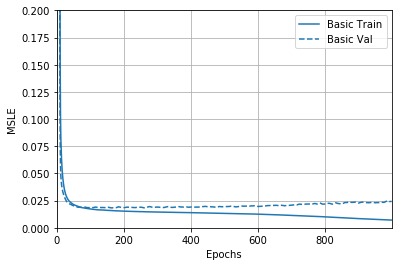

In [77]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_squared_logarithmic_error")
plt.ylim([0, 0.2])
plt.ylabel('MSLE')

#print (f'Test RMSLE: {np.sqrt(hist.tail(1)['mean_squared_logarithmic_error'])}')

In [78]:
final_rmsle = np.sqrt(model.evaluate(X_train_full, Y_train_full, verbose=2)[3])
print (f'\nFinal RMSLE on full training set: {final_rmsle}')

46/46 - 0s - loss: 295835744.0000 - mae: 10824.3633 - mse: 295835744.0000 - mean_squared_logarithmic_error: 0.0091

Final RMSLE on full training set: 0.09525302708219874


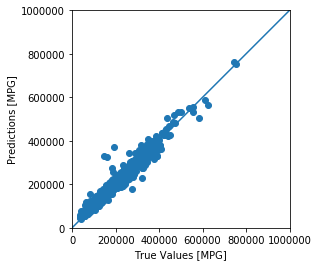

In [79]:
test_predictions = model.predict(X_train_full).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_train_full, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [80]:
tf.test.is_built_with_cuda()

True

In [81]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]